# Code for Morris-Lecar neurons

I am trying to find the 3 classes of behavior of the Morris Lecar neuron model but I am having trouble.<br>
Everything is taken from the attached paper. <br>

It consists of a two dimensional model  with voltage of the neuron being the first variable and w a gating variable.<br>
The constant bw is the one that changes and gives us the different models of neuron behavior as I state below <br>
bw=-21 for class 3, bw=-13 for class 2, bw=0 for class 1<br>

The **problem** is that the behavior of class 3 neuron is not stable and for class 1 not visible. 

## libraries

In [82]:
from brian2 import *
import scipy.io as sio
%matplotlib inline

start_scope()

### constants 

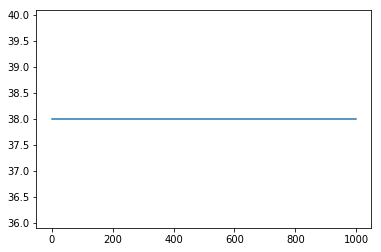

In [83]:
#constants for main model
C=2*ufarad
Bm=-1.2*mV 
phiw=0.15*kHz
gamma_m=18*mV
gamma_w=10*mV
gfast=20*mS  
E_Na=50*mV
gslow=20*mS 
E_K=-100*mV
gleak=2*mS
E_leak=-70*mV

#constant current
Iconst=38

#new stimulus with scaling
TimedA=[]
for x in range(20000):
    TimedA.append(0)
for i,x in enumerate(TimedA):
    x=Iconst
    TimedA[i]=x
    
#checking to see if values were added right
plot(TimedA[0:1000])

#making the stimulus
stimulus=TimedArray(TimedA*uamp,dt=0.1*ms)

#MAIN CONSTANT OF MODEL
Bw=-0*mV #-21 for class 3, -13 for class 2, 0 for class 1

### model equations

In [84]:
eqs ='''
dV/dt=1/C*(stimulus(t)-gfast*hinf*(V-E_Na)-gslow*w*(V-E_K)-gleak*(V-E_leak)): volt
hinf = 0.5*(1+tanh((V-Bm)/gamma_m)) : 1
dw/dt= phiw*lambda_w*(winf-w) : 1
winf = 0.5*(1+tanh((V-Bw)/gamma_w)) : 1
lambda_w = cosh((V-Bw)/(2*gamma_w)) : 1
'''

### neuron statement

In [85]:
G=NeuronGroup(1,eqs,dt=0.1*ms,method='euler',events={'custom_event1': 'w>1','custom_event2': 'w<0'})
initial_values = {'V': -70*mV, 'w': 0.}
G.set_states(initial_values)
G.run_on_event('custom_event1','w=1')
G.run_on_event('custom_event2','w=0')

Resetter(clock=Clock(dt=100. * usecond, name='neurongroup_clock_5'), when=after_resets, order=0, name='neurongroup_resetter_6')

### monitor statement

In [86]:
M = StateMonitor(G, 'V', record=True,dt=0.1*ms)
N = StateMonitor(G,'w',record=True,dt=0.1*ms)

## Running the simulation

In [87]:
run(1000*ms,report='stdout',report_period=60*second)

WARNING    /home/tzikos/anaconda3/lib/python3.6/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /home/tzikos/.cython/brian_extensions/_cython_magic_c930e5051cd2b521c497e9548f1b1385.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
 [py.warnings]


Starting simulation at t=0. s for a duration of 1. s
1.0 (100%) simulated in < 1s


### calculate number of spikes

In [88]:
spikes=0
#iterate in list of M.V[0] with three iterators to find the spikes
for i,x in enumerate(M.V[0]):
    if (i>=1) and (i<9999):
        if M.V[0][i-1]<M.V[0][i] and M.V[0][i+1]<M.V[0][i] and M.V[0][i]>=10*mV:
            spikes+=1
print('The firing rate is :',spikes)

The firing rate is : 50


### plot

Text(0,0.5,'w')

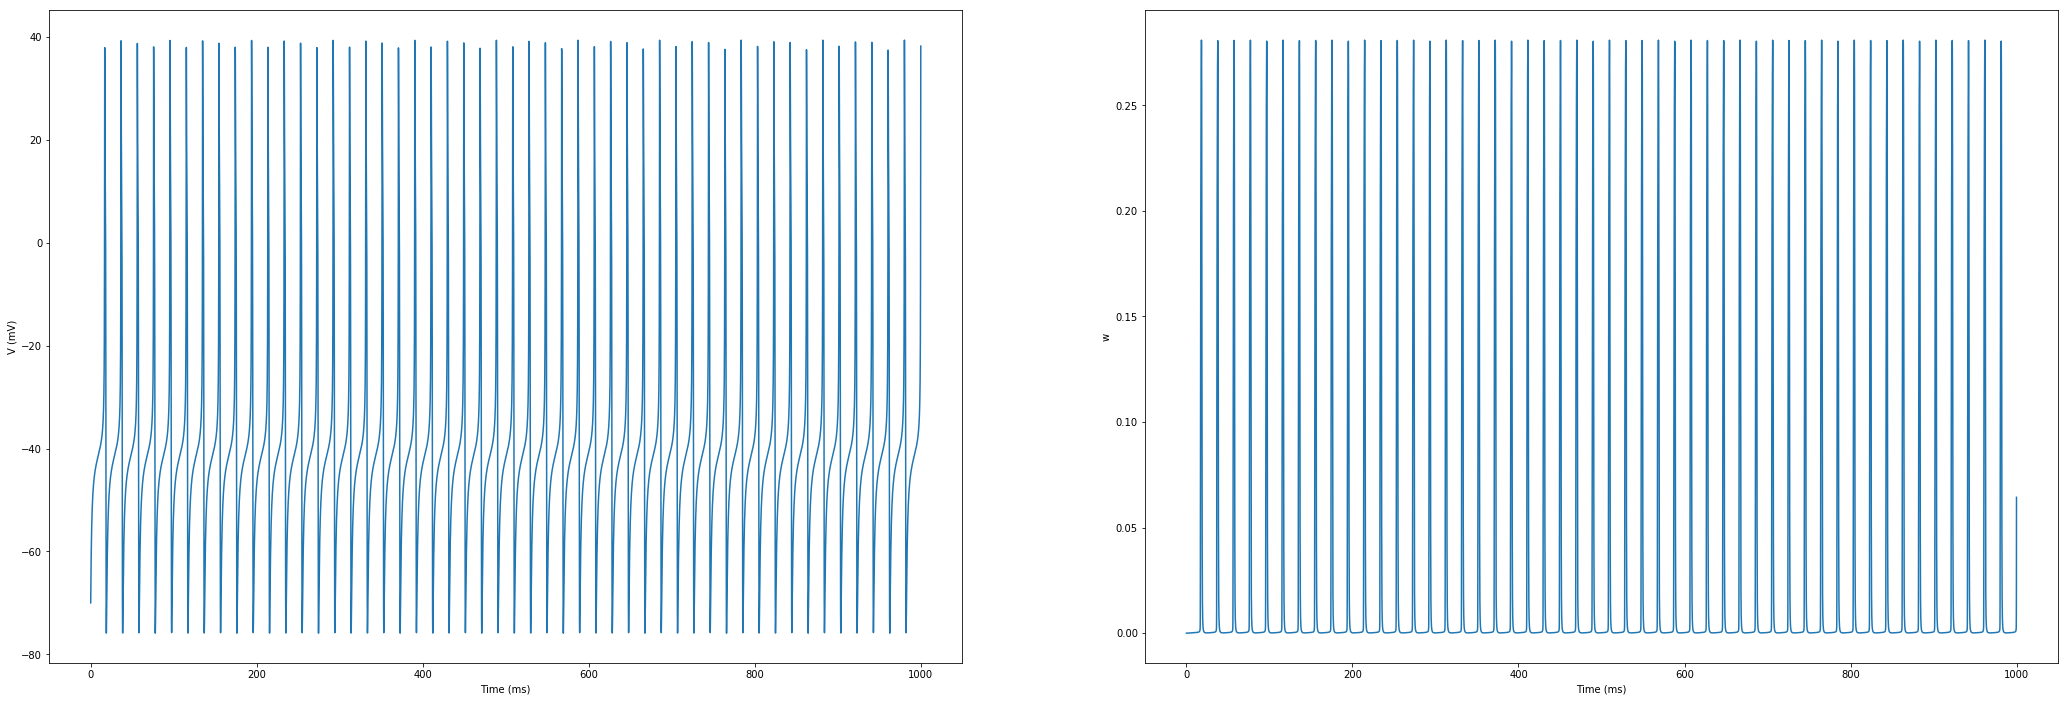

In [89]:
#plotting
figure(figsize=(36,12))
subplot(121)
plot(M.t/ms, M.V[0]/mV)
xlabel('Time (ms)')
ylabel('V (mV)')
subplot(122)
plot(M.t/ms, N.w[0])
xlabel('Time (ms)')
ylabel('w')

### interesting  behavior

Class 3 behavior for I around 70 but after a point it becomes class 2 while it should not do that.<br>
Class 2 behavior is on point.<br>
Class 1 seems non existent. <br>
**I think something is wrong but I cannot find out what exactly.Can you pls help me?**